In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pathlib

In [ ]:
os.chdir('/content/drive/MyDrive/intern/object_detection/Dataset/leaves')

In [ ]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [ ]:
!pip install wandb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wandb

wandb.init(project="leaves", entity="4-4-2")

In [ ]:
cd yolov5/

[Errno 2] No such file or directory: 'yolov5/'
/content/drive/.shortcut-targets-by-id/1Sqoz47j_JYWJ1NAZ1sIcmR1rmjlZtUZu/intern/object_detection/Dataset/leaves/yolov5


In [ ]:
!python train.py --img 640 --cfg yolov5s.yaml --hyp hyp.scratch-med.yaml --batch 32 --epochs 100 --data brown_spot_data.yaml --weights yolov5s.pt --workers 24 --name brownspotleaves

wandb: Currently logged in as: kendeman (4-4-2). Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=brown_spot_data.yaml, hyp=hyp.scratch-med.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=runs/train, name=brownspotleaves, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-304-g51fb467 Python-3.7.13 torch-1.11.0+cu102 CPU

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, o

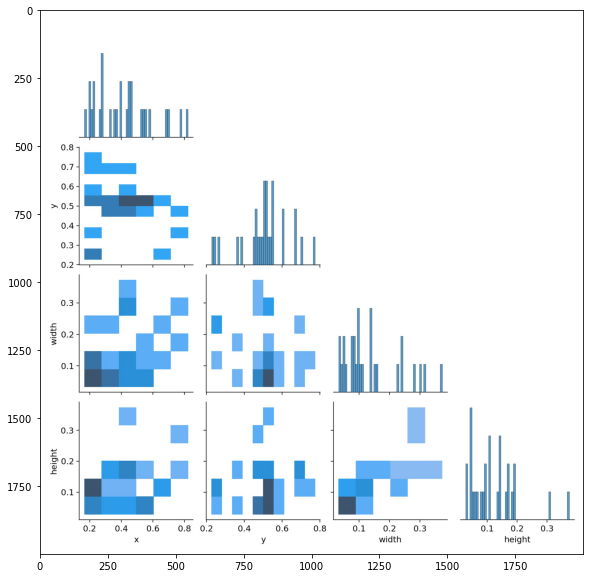

In [ ]:
detections_dir = "runs/train/brownspotleaves2"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.figure(figsize=(10,10))
plt.imshow(np.array(random_detection_image))


In [ ]:
!python detect.py --source 0  # webcam
                            file.jpg  # image 
                            file.mp4  # video
                            path/  # directory
                            path/*.jpg  # glob
                            rtsp://170.93.143.139/rtplive/470011e600ef003a004ee33696235daa  # rtsp stream
                            rtmp://192.168.1.105/live/test  # rtmp stream
                            http://112.50.243.8/PLTV/88888888/224/3221225900/1.m3u8  # http stream

# Computing mAP on test dataset

In [ ]:
!python val.py --weightsruns/train/brown_spot_leaves7/weights/best.pt --data brown_spot_data.yaml --task test --name brown_spot_l

In [ ]:
!python detect.py --source ../images/test/ --weights runs/train/brown_spot_leaves7/weights/best.pt --conf 0.25 --name brown_spot_leaves7

detect: weights=['runs/train/brown_spot_leaves7/weights/best.pt'], source=../images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=brown_spot_leaves7, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-304-g51fb467 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/2 /content/drive/.shortcut-targets-by-id/1Sqoz47j_JYWJ1NAZ1sIcmR1rmjlZtUZu/intern/object_detection/Dataset/fruits/images/test/20200205_155504.jpg: 640x640 Done. (0.014s)
image 2/2 /content/drive/.shortcut-targets-by-id/1Sqoz47j_JYWJ1NAZ1sIcmR1rmjlZtUZu/intern/object_detection/Dataset/fruits/images/test/20200205_155522.jpg: